In [ ]:
import asyncio
import requests
from concurrent.futures import ThreadPoolExecutor
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
import time
from PIL import Image
from io import BytesIO
test2 = pd.read_parquet("data100k.parquet.gzip")
test2 = test2.head(30000).tail(10000)
print(test2.info())

p = [{"http":"http://95.181.186.156:3128", "http":"http://176.121.1.163:8989",
      "http":"http://95.9.89.25:8080", "http":"http://158.181.204.159:8080",
      "http":"http://212.108.135.215:9090", "http":"http://103.152.112.157:80"}]
proxies = [{"http":"http://193.105.123.196:8123"}, {"http":"http://46.254.220.30:8080"},
      {"http":"http://89.175.0.74:3129"}, {"http":"http://92.255.196.39:8080"},
      {"http":"http://212.108.135.215:9090"}, {"http":"http://78.85.35.180"},
      {"http":"http://5.166.101.194"}, {"http":"http://193.169.4.12"}]
itog = pd.DataFrame(columns=["Id_typology", "Img_url", "Img_path"])
for i in range(len(proxies)):
    proxies[i] = [proxies[i], False]
print(proxies)
def f1(data):
    url = data[1]
    label = data[0]
    idx = data[2]
    while (proxies[idx%8][1]):
        time.sleep(0.25)
    time.sleep(2)
    proxy = proxies[idx % 8][0]
    proxies[idx%8][1] = True
    
    try:
        resp = requests.get(url, proxies=proxy, timeout=5)
        resp.raise_for_status()
        proxies[idx%8][1] = False
        print(idx)
        img = Image.open(BytesIO(resp.content)).convert("RGB")
        img.verify()
        s = str(idx)
        while len(s) < 5:
            s = "0" + s
        img.save(fr"/home/jupyter/datasphere/project/images_path30k/{s}.png", format='PNG')
        itog.loc[len(itog)] = [int(label), url, f"{s}.png"]
        return True

    except Exception as e:
        proxies[idx%8][1] = False
        print(f"bad url: {url} proxy: {proxy} exception: {e} all: {idx}")
        return False

urls = []
for i in range(0, 10000):
    row = test2.iloc[i]
    label = row['class']
    url = row["image"]
    url = "https"+url.strip("https")
    urls.append([int(label), url, i+20000])

print(*urls[:10])



Unknown instance spec: Please select VM configuration

In [ ]:
test2

In [ ]:
async def async_f1(data):
    loop = asyncio.get_event_loop()
    return await loop.run_in_executor(None, f1, data)

async def main(urls):
    tasks = [async_f1(url) for url in urls]
    results = await asyncio.gather(*tasks)
    return results

async def run1():
    results = await main(urls)
    print(results)
    
await run1()

20000
bad url: https://goskatalog.ru/muzfo-imaginator/rest/images/original/54062800 proxy: {'http': 'http://46.254.220.30:8080'} exception: 404 Client Error: Not Found for url: https://goskatalog.ru/muzfo-imaginator/rest/images/original/54062800 all: 20001
bad url: https://goskatalog.ru/muzfo-imaginator/rest/images/original/42864834 proxy: {'http': 'http://193.105.123.196:8123'} exception: 400 Client Error: Bad Request for url: https://goskatalog.ru/muzfo-imaginator/rest/images/original/42864834 all: 20008
20003
20002
bad url: https://goskatalog.ru/muzfo-imaginator/rest/images/original/42864836 proxy: {'http': 'http://193.169.4.12'} exception: 400 Client Error: Bad Request for url: https://goskatalog.ru/muzfo-imaginator/rest/images/original/42864836 all: 20007
20011
bad url: https://goskatalog.ru/muzfo-imaginator/rest/images/original/42864835 proxy: {'http': 'http://78.85.35.180'} exception: 400 Client Error: Bad Request for url: https://goskatalog.ru/muzfo-imaginator/rest/images/origi

In [4]:
print("ok")

ok


In [5]:
print(len(itog))
print(itog)

8960
      Id_typology                                            Img_url  \
0               8  https://goskatalog.ru/muzfo-imaginator/rest/im...   
1              10  https://goskatalog.ru/muzfo-imaginator/rest/im...   
2              18  https://goskatalog.ru/muzfo-imaginator/rest/im...   
3               8  https://goskatalog.ru/muzfo-imaginator/rest/im...   
4              16  https://goskatalog.ru/muzfo-imaginator/rest/im...   
...           ...                                                ...   
8955            2  https://goskatalog.ru/muzfo-imaginator/rest/im...   
8956           17  https://goskatalog.ru/muzfo-imaginator/rest/im...   
8957           10  https://goskatalog.ru/muzfo-imaginator/rest/im...   
8958           13  https://goskatalog.ru/muzfo-imaginator/rest/im...   
8959           12  https://goskatalog.ru/muzfo-imaginator/rest/im...   

       Img_path  
0     20003.png  
1     20000.png  
2     20002.png  
3     20011.png  
4     20010.png  
...         ...  
8955

In [6]:
itog.to_parquet('images_path30k.parquet.gzip', compression='gzip')

In [9]:
# import module
import os
 
# assign size
size = 0
 
# assign folder path
Folderpath = '/home/jupyter/datasphere/project/images_path30k'
 
# get size
for path, dirs, files in os.walk(Folderpath):
    for f in files:
        fp = os.path.join(path, f)
        size += (os.path.getsize(fp))
 
print("Folder size: " + str(size/(2**20)))

Folder size: 16957.572461128235


In [16]:
test = pd.read_parquet('images_path10k.parquet.gzip')
test

,Id_typology,Img_url,Img_path
0,14,https://goskatalog.ru/muzfo-imaginator/rest/im...,00009.png
1,14,https://goskatalog.ru/muzfo-imaginator/rest/im...,00011.png
2,12,https://goskatalog.ru/muzfo-imaginator/rest/im...,00003.png
3,17,https://goskatalog.ru/muzfo-imaginator/rest/im...,00001.png
4,10,https://goskatalog.ru/muzfo-imaginator/rest/im...,00007.png
...,...,...,...
8927,14,https://goskatalog.ru/muzfo-imaginator/rest/im...,09995.png
8928,11,https://goskatalog.ru/muzfo-imaginator/rest/im...,09989.png
8929,16,https://goskatalog.ru/muzfo-imaginator/rest/im...,09999.png
8930,3,https://goskatalog.ru/muzfo-imaginator/rest/im...,09998.png


In [17]:
grouped = test.groupby("Id_typology", as_index=False).agg({"Img_path":"count"})
index = pd.read_parquet('type_id.parquet.gzip').rename(columns={"Идентификатор типологии":"Id_typology"})
grouped = grouped.merge(index, on="Id_typology", how="left").rename(columns={"Img_path":"Count"})
grouped

,Id_typology,Count,Типология
0,1,506,живопись
1,2,533,графика
2,3,631,скульптура
3,5,605,предметы нумизматики
4,6,570,предметы археологии
5,8,612,оружие
6,10,426,предметы естественнонаучной коллекции
7,11,686,предметы техники
8,12,596,прочие
9,13,653,"предметы прикладного искусства, быта и этнографии"


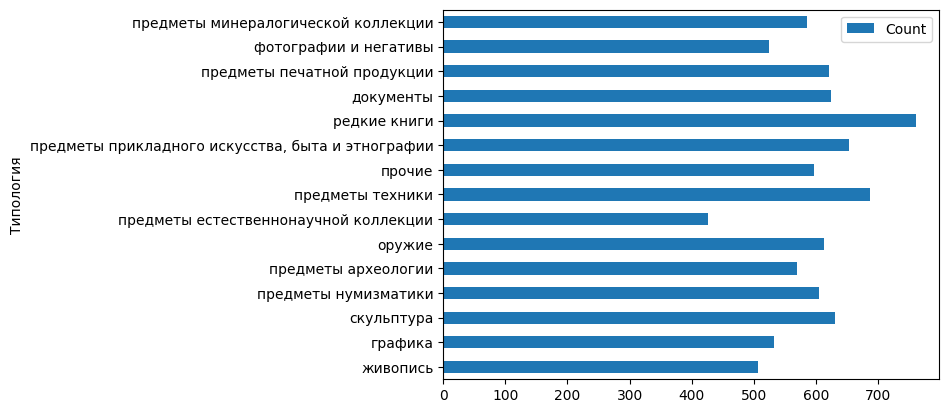

In [18]:
grouped.plot(kind="barh", x="Типология", y="Count");